In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [51]:
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [52]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [53]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))


0.44553225151184195
0.4380466345914474


In [59]:
n=2
estimates =np.empty(shape=[0, n])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    lasso = linear_model.Lasso(alpha=lambd, fit_intercept=False)
    lasso.fit(X_train2, Y_train)
    print(lasso.score(X_train2,Y_train))

    estimates = np.row_stack((
    estimates,
    np.append(lasso.score(X_train2, Y_train),[lambd])))

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-p

0.0046302851062620665
0.004048761839661519
0.0034597433599656835
0.0028632296671744495


/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-p

0.002259737401919093
0.0016488185098985086
0.0010304185020013623
0.0004045373782279871
-1.518107895015497e-05
-1.5181151074017407e-05
-1.5181231211469637e-05
-1.5181319362733701e-05
-1.518141552803165e-05
-1.5181519706697344e-05
-1.518163189939692e-05
-1.5181752105908329e-05
-1.518188032578749e-05
-1.5182016559922573e-05
-1.5182160807425404e-05
-1.5182313068518027e-05
-1.5182473343866576e-05
-1.5182641632804916e-05
-1.5182817935333048e-05
-1.5183002251895061e-05
-1.5183194582268912e-05


In [61]:
print(estimates)

[[ 4.63028511e-03  1.00000000e+00]
 [ 4.04876184e-03  3.00000000e+00]
 [ 3.45974336e-03  5.00000000e+00]
 [ 2.86322967e-03  7.00000000e+00]
 [ 2.25973740e-03  9.00000000e+00]
 [ 1.64881851e-03  1.10000000e+01]
 [ 1.03041850e-03  1.30000000e+01]
 [ 4.04537378e-04  1.50000000e+01]
 [-1.51810790e-05  1.70000000e+01]
 [-1.51811511e-05  1.90000000e+01]
 [-1.51812312e-05  2.10000000e+01]
 [-1.51813194e-05  2.30000000e+01]
 [-1.51814155e-05  2.50000000e+01]
 [-1.51815197e-05  2.70000000e+01]
 [-1.51816319e-05  2.90000000e+01]
 [-1.51817521e-05  3.10000000e+01]
 [-1.51818803e-05  3.30000000e+01]
 [-1.51820166e-05  3.50000000e+01]
 [-1.51821608e-05  3.70000000e+01]
 [-1.51823131e-05  3.90000000e+01]
 [-1.51824733e-05  4.10000000e+01]
 [-1.51826416e-05  4.30000000e+01]
 [-1.51828179e-05  4.50000000e+01]
 [-1.51830023e-05  4.70000000e+01]
 [-1.51831946e-05  4.90000000e+01]]


In [65]:
print(list(X_train2.columns))

['default', 'student', 'balance', 'balance_student', 'balance_default', 'student_default', 'balance_sqrt', 'balance2', 'balance3']


In [66]:
# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=['R2'] + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

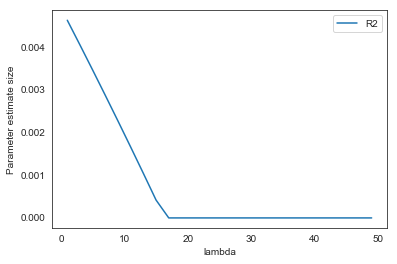

In [68]:
# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:1,])


# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()